In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

In [2]:
#!pip install lxml
#! pip install unidecode
#! pip install selenium

In [3]:
#! pip install bs4

In [4]:
#! pip install webdriver_manager

In [5]:
#! pip install chardet

In [6]:
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver import ActionChains
import pandas as pd
import numpy as np
import os
import time
import re
import unidecode
import time 
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt 
import chardet
import geopandas as gpd

## 2 Import "Data Dengue infected by district for 2015 to 2021"

In [7]:
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [8]:
table1 = pd.read_csv('../../_data/data_dengue_peru.csv', encoding = charenc, thousands = ",", dtype= {"Ubigeo":"str"})
table1

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [9]:
table1.dtypes

Año                  int64
Semana               int64
Eventos o daños     object
Departamento        object
Distrito            object
Provincia           object
Ubigeo              object
Casos              float64
dtype: object

In [10]:
table1 ['Año'].unique()

array([2020, 2021, 2019, 2017, 2016, 2018, 2015], dtype=int64)

## 3 Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [11]:
table1['Ubigeo_Departments'] = table1['Ubigeo'].astype(str).str[:2]
table1

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departments
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08
...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17


In [12]:
table1['Ubigeo_Provinces'] = table1['Ubigeo'].astype(str).str[:4]
table1

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departments,Ubigeo_Provinces
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [13]:
table1 = table1.drop(columns = "Eventos o daños")
table1

,Año,Semana,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departments,Ubigeo_Provinces
0,2020,43,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...
172139,2021,49,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


## 4 Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [14]:
table2 = gpd.read_file( r'..\..\_data\LIMITE_DISTRITAL_2020_INEI\INEI_LIMITE_DISTRITAL.shp' )
table2

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [15]:
table3 = table2[['UBIGEO', 'geometry']]
table3 = table3.rename(columns={'UBIGEO':'Ubigeo'})
table3 = table3.sort_values('Ubigeo')
table3

,Ubigeo,geometry
1159,010101,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178..."
1331,010102,"POLYGON ((-77.74482 -5.94497, -77.74482 -5.945..."
1125,010103,"POLYGON ((-77.93580 -6.69039, -77.93531 -6.690..."
1153,010104,"POLYGON ((-77.71486 -6.24598, -77.71485 -6.245..."
1172,010105,"POLYGON ((-77.77405 -5.99598, -77.77328 -5.996..."
...,...,...
1627,250302,"POLYGON ((-75.14649 -8.53886, -75.14614 -8.544..."
1630,250303,"POLYGON ((-75.45297 -8.21007, -75.45304 -8.210..."
1629,250304,"POLYGON ((-75.01663 -8.44514, -75.01650 -8.445..."
1626,250305,"POLYGON ((-75.02136 -8.73948, -75.02136 -8.739..."


In [16]:
dengue_2021 = table1[table1.Año == 2021]
dengue_2021

,Año,Semana,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departments,Ubigeo_Provinces
1,2021,41,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
6,2021,41,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,1501
7,2021,41,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,1501
8,2021,41,LIMA,ATE,LIMA,150103,NaN,15,1501
...,...,...,...,...,...,...,...,...,...
172139,2021,49,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [17]:
dengue_shpa= table3.merge(dengue_2021)
dengue_shpa

,Ubigeo,geometry,Año,Semana,Departamento,Distrito,Provincia,Casos,Ubigeo_Departments,Ubigeo_Provinces
0,010101,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178...",2021,41,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,NaN,01,0101
1,010101,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178...",2021,42,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,NaN,01,0101
2,010101,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178...",2021,43,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,NaN,01,0101
3,010101,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178...",2021,44,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,NaN,01,0101
4,010101,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178...",2021,45,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,NaN,01,0101
...,...,...,...,...,...,...,...,...,...,...
24852,250401,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,49,UCAYALI,PURUS,PURUS,NaN,25,2504
24853,250401,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,50,UCAYALI,PURUS,PURUS,NaN,25,2504
24854,250401,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,51,UCAYALI,PURUS,PURUS,NaN,25,2504
24855,250401,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,52,UCAYALI,PURUS,PURUS,NaN,25,2504


In [18]:
dist_shpe = dengue_shpa.iloc[:,[0,7]]
dist_shpe

,Ubigeo,Casos
0,010101,NaN
1,010101,NaN
2,010101,NaN
3,010101,NaN
4,010101,NaN
...,...,...
24852,250401,NaN
24853,250401,NaN
24854,250401,NaN
24855,250401,NaN


In [19]:
dist_shpe2 = dist_shpe.groupby(['Ubigeo']).sum().reset_index()
dist_shpe2

,Ubigeo,Casos
0,010101,0.0
1,010201,474.0
2,010202,25.0
3,010203,38.0
4,010204,8.0
...,...,...
464,250302,26.0
465,250303,32.0
466,250304,14.0
467,250305,2.0


In [20]:
dist_shpe3 = dist_shpe2.merge(table3)
dist_shpe3

,Ubigeo,Casos,geometry
0,010101,0.0,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178..."
1,010201,474.0,"POLYGON ((-78.54199 -5.48418, -78.54093 -5.485..."
2,010202,25.0,"POLYGON ((-78.46184 -5.17378, -78.46005 -5.173..."
3,010203,38.0,"POLYGON ((-78.32548 -5.56151, -78.32598 -5.562..."
4,010204,8.0,"POLYGON ((-78.48046 -5.59582, -78.47907 -5.596..."
...,...,...,...
464,250302,26.0,"POLYGON ((-75.14649 -8.53886, -75.14614 -8.544..."
465,250303,32.0,"POLYGON ((-75.45297 -8.21007, -75.45304 -8.210..."
466,250304,14.0,"POLYGON ((-75.01663 -8.44514, -75.01650 -8.445..."
467,250305,2.0,"POLYGON ((-75.02136 -8.73948, -75.02136 -8.739..."


In [21]:
dist_shpe3_beta = pd.merge(dist_shpe2, table3, on = ['Ubigeo'], how = 'outer')
dist_shpe3_beta

,Ubigeo,Casos,geometry
0,010101,0.0,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178..."
1,010201,474.0,"POLYGON ((-78.54199 -5.48418, -78.54093 -5.485..."
2,010202,25.0,"POLYGON ((-78.46184 -5.17378, -78.46005 -5.173..."
3,010203,38.0,"POLYGON ((-78.32548 -5.56151, -78.32598 -5.562..."
4,010204,8.0,"POLYGON ((-78.48046 -5.59582, -78.47907 -5.596..."
...,...,...,...
1869,230404,NaN,"POLYGON ((-70.07077 -17.51846, -70.06959 -17.5..."
1870,230405,NaN,"POLYGON ((-70.13903 -17.31495, -70.13555 -17.3..."
1871,230406,NaN,"POLYGON ((-70.07241 -17.03533, -70.07143 -17.0..."
1872,230407,NaN,"POLYGON ((-69.94363 -17.46296, -69.94263 -17.4..."


In [22]:
dist_shpe3_beta = dist_shpe3_beta.sort_values('Ubigeo')
dist_shpe3_beta

,Ubigeo,Casos,geometry
0,010101,0.0,"POLYGON ((-77.88580 -6.17780, -77.88323 -6.178..."
469,010102,NaN,"POLYGON ((-77.74482 -5.94497, -77.74482 -5.945..."
470,010103,NaN,"POLYGON ((-77.93580 -6.69039, -77.93531 -6.690..."
471,010104,NaN,"POLYGON ((-77.71486 -6.24598, -77.71485 -6.245..."
472,010105,NaN,"POLYGON ((-77.77405 -5.99598, -77.77328 -5.996..."
...,...,...,...
464,250302,26.0,"POLYGON ((-75.14649 -8.53886, -75.14614 -8.544..."
465,250303,32.0,"POLYGON ((-75.45297 -8.21007, -75.45304 -8.210..."
466,250304,14.0,"POLYGON ((-75.01663 -8.44514, -75.01650 -8.445..."
467,250305,2.0,"POLYGON ((-75.02136 -8.73948, -75.02136 -8.739..."


<AxesSubplot:>

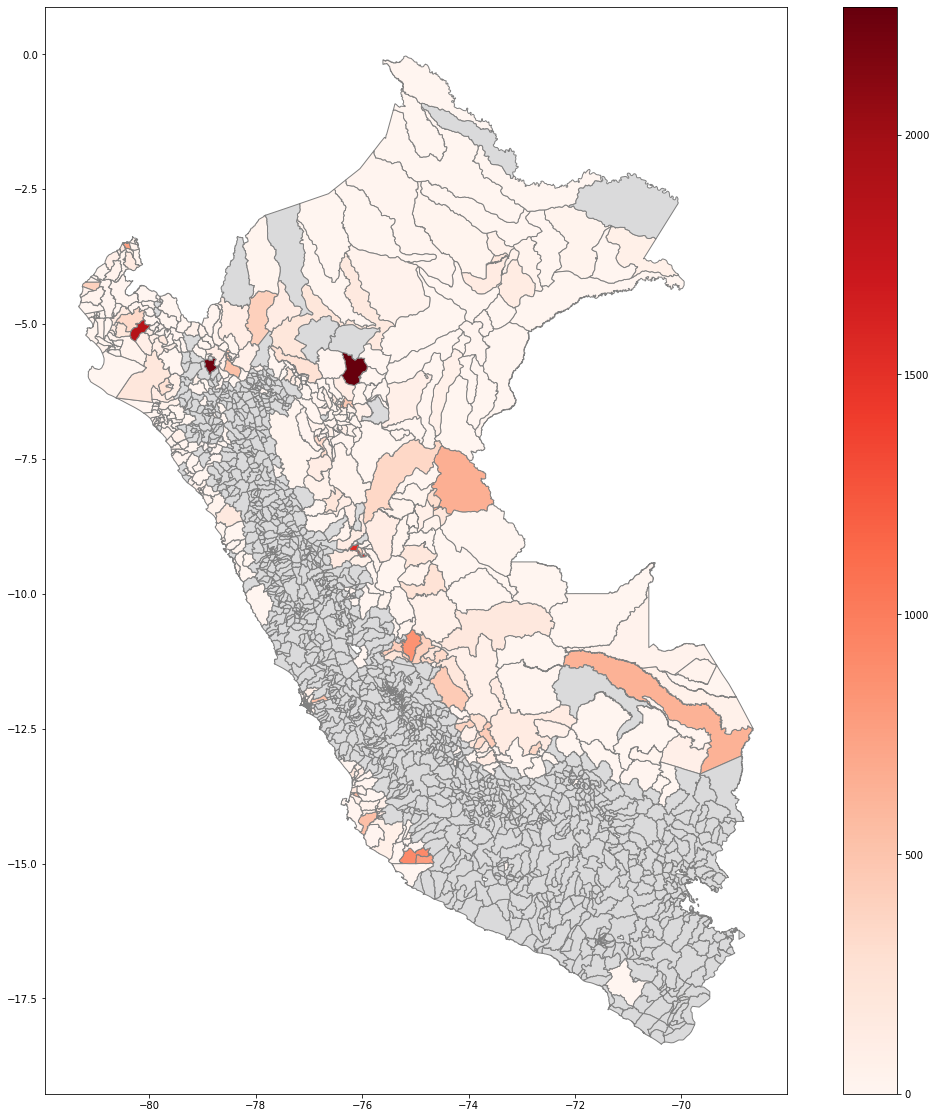

In [23]:
dist_shpe3_beta.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True, 
          missing_kwds= dict(color = "#DADADB"))          

<AxesSubplot:>

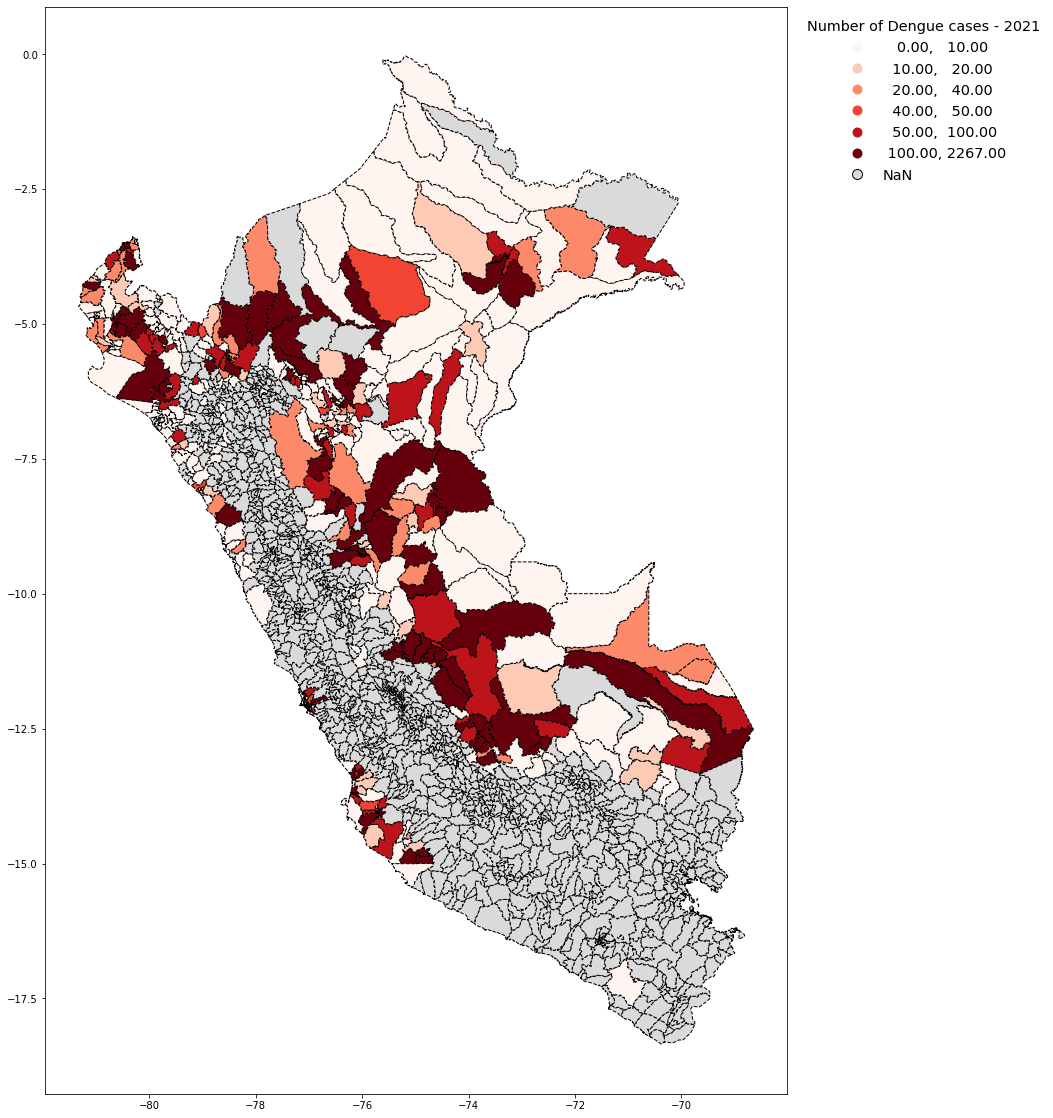

In [24]:
fig1, ax = plt.subplots(figsize=(20, 20))
dist_shpe3_beta.plot( ax = ax, 
        column='Casos', 
         cmap= 'Reds', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         missing_kwds= dict(color = "#DADADB",), 
         classification_kwds = dict( bins = [ 10, 20, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Dengue cases - 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

## 5 Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [25]:
table4 = table2[['IDPROV', 'geometry']]
table5 = table4.dissolve( by = 'IDPROV' ).reset_index()
table6 = table5.rename(columns={'IDPROV':'Ubigeo_Provinces'})
table6

,Ubigeo_Provinces,geometry
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948..."
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565..."
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037..."
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475..."
4,0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693..."
...,...,...
191,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620..."
192,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685..."
193,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0..."
194,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902..."


In [26]:
prov_shp = table6.merge(dengue_2021)
prov_shp

,Ubigeo_Provinces,geometry,Año,Semana,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departments
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,41,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
1,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,42,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
2,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,43,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
3,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,44,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
4,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,45,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
...,...,...,...,...,...,...,...,...,...,...
24852,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,49,UCAYALI,PURUS,PURUS,250401,NaN,25
24853,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,50,UCAYALI,PURUS,PURUS,250401,NaN,25
24854,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,51,UCAYALI,PURUS,PURUS,250401,NaN,25
24855,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,52,UCAYALI,PURUS,PURUS,250401,NaN,25


In [27]:
prov_shpe = prov_shp.iloc[:,[0,1,8]]
prov_shpe

,Ubigeo_Provinces,geometry,Casos
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",NaN
1,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",NaN
2,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",NaN
3,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",NaN
4,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",NaN
...,...,...,...
24852,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",NaN
24853,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",NaN
24854,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",NaN
24855,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",NaN


In [28]:
#prov_shp['Casos'].sum()

In [29]:
prov_shpe2 = prov_shpe.groupby(['Ubigeo_Provinces']).sum().reset_index()
prov_shpe2

,Ubigeo_Provinces,Casos
0,0101,0.0
1,0102,676.0
2,0103,0.0
3,0104,435.0
4,0107,719.0
...,...,...
87,2403,72.0
88,2501,1241.0
89,2502,179.0
90,2503,193.0


In [30]:
prov_shpe3 = prov_shpe2.merge(table6)
prov_shpe3

,Ubigeo_Provinces,Casos,geometry
0,0101,0.0,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948..."
1,0102,676.0,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565..."
2,0103,0.0,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037..."
3,0104,435.0,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475..."
4,0107,719.0,"POLYGON ((-78.13517 -5.89454, -78.13515 -5.894..."
...,...,...,...
87,2403,72.0,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620..."
88,2501,1241.0,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685..."
89,2502,179.0,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0..."
90,2503,193.0,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902..."


In [31]:
prov_shpe3_beta = pd.merge(prov_shpe2, table6, on = ['Ubigeo_Provinces'], how = 'outer')
prov_shpe3_beta

,Ubigeo_Provinces,Casos,geometry
0,0101,0.0,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948..."
1,0102,676.0,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565..."
2,0103,0.0,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037..."
3,0104,435.0,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475..."
4,0107,719.0,"POLYGON ((-78.13517 -5.89454, -78.13515 -5.894..."
...,...,...,...
191,2113,NaN,"MULTIPOLYGON (((-69.02517 -16.35844, -69.02451..."
192,2301,NaN,"POLYGON ((-70.35388 -18.32619, -70.36031 -18.3..."
193,2302,NaN,"POLYGON ((-70.27666 -17.39153, -70.27763 -17.3..."
194,2303,NaN,"POLYGON ((-70.72932 -17.78509, -70.73006 -17.7..."


In [32]:
prov_shpe3_beta = prov_shpe3_beta.sort_values('Ubigeo_Provinces')
prov_shpe3_beta

,Ubigeo_Provinces,Casos,geometry
0,0101,0.0,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948..."
1,0102,676.0,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565..."
2,0103,0.0,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037..."
3,0104,435.0,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475..."
92,0105,NaN,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693..."
...,...,...,...
87,2403,72.0,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620..."
88,2501,1241.0,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685..."
89,2502,179.0,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0..."
90,2503,193.0,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902..."


<AxesSubplot:>

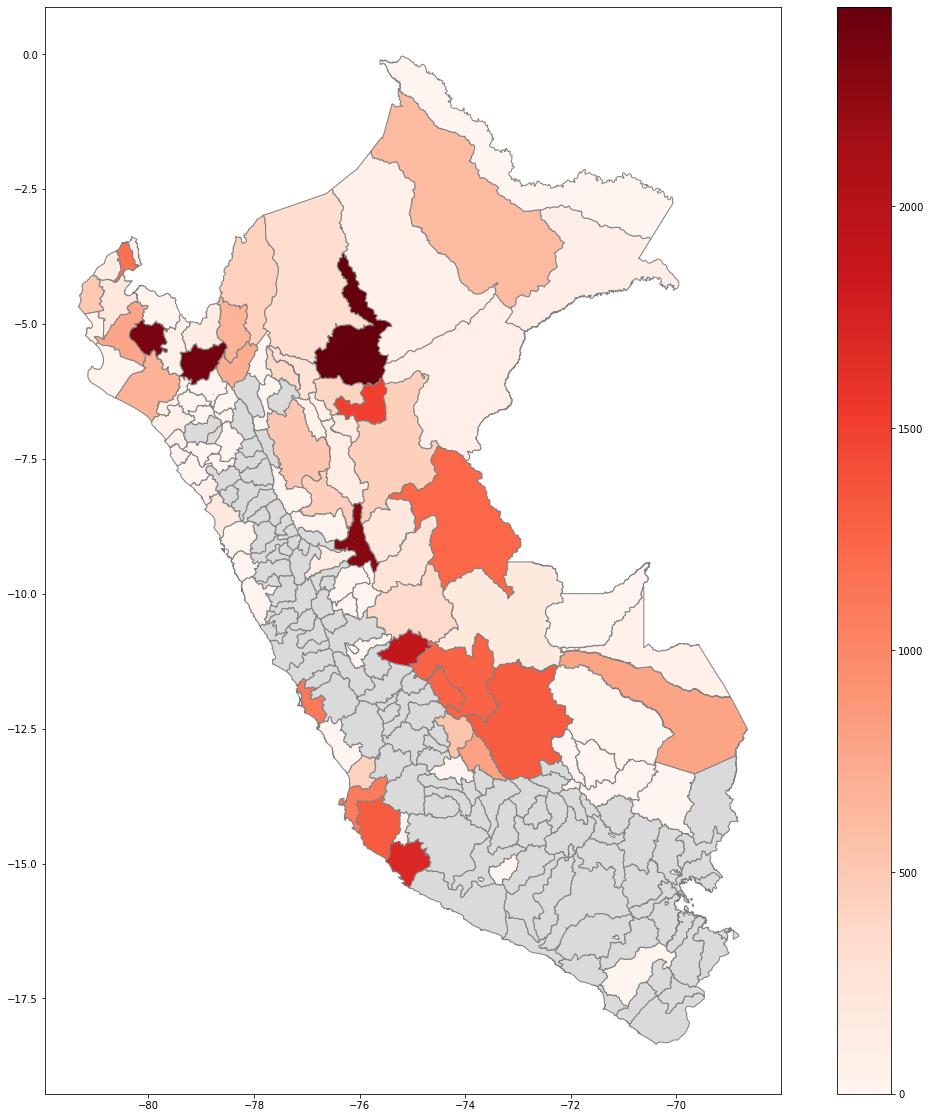

In [33]:
prov_shpe3_beta.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True,
          missing_kwds= dict(color = "#DADADB"))

<AxesSubplot:>

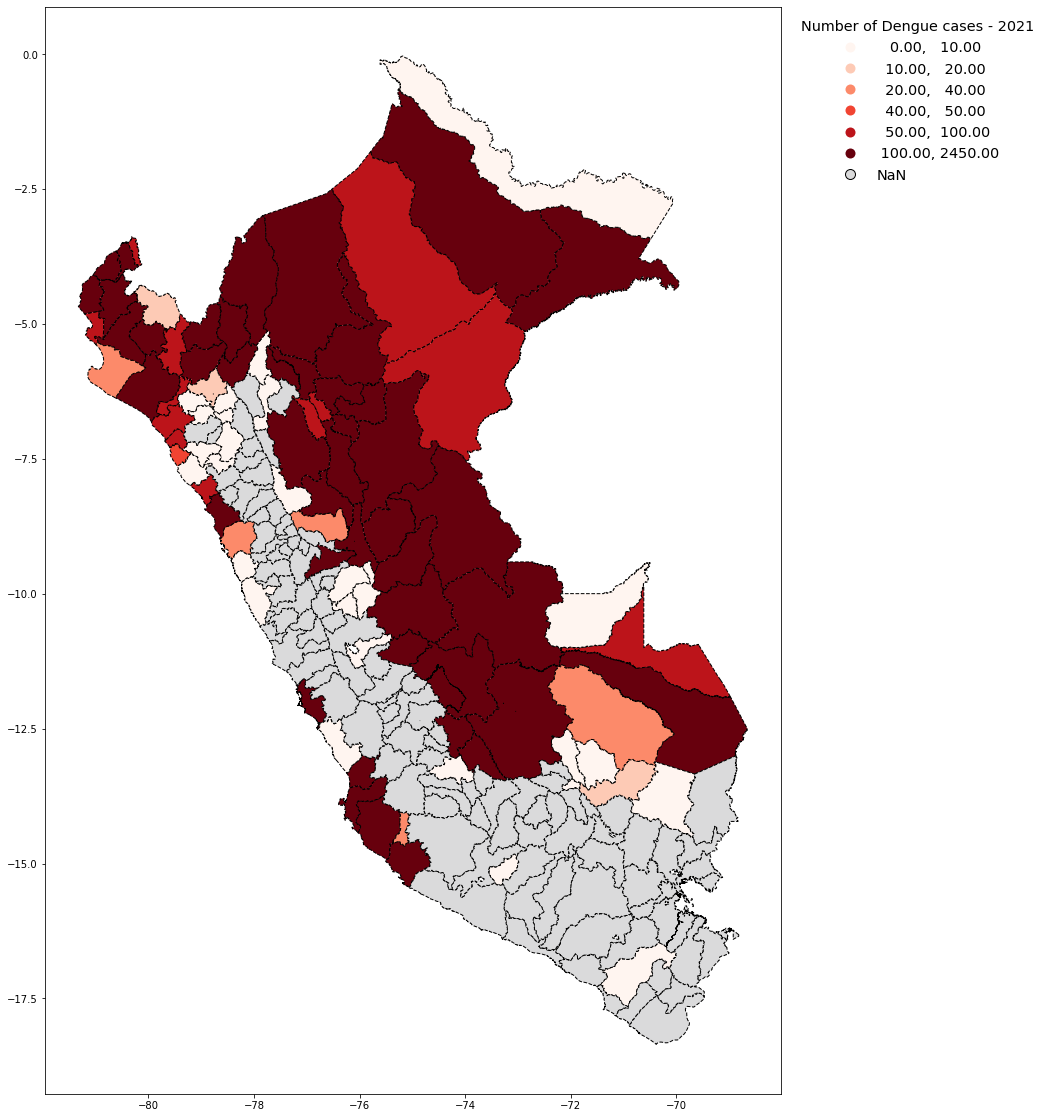

In [34]:
fig1, ax = plt.subplots(figsize=(20, 20))
prov_shpe3_beta.plot( ax = ax, 
        column='Casos', 
         cmap= 'Reds', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         missing_kwds= dict(color = "#DADADB",), 
         classification_kwds = dict( bins = [ 10, 20, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Dengue cases - 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

# 6 Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. **Do not forget to indicate the color of NA values.** Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [35]:
table7 = table2[['CCDD', 'geometry']]
table7 = table7.dissolve( by = 'CCDD' ).reset_index()
table7 = table7.rename(columns={'CCDD':'Ubigeo_Departments'})
table7

,Ubigeo_Departments,geometry
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,02,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
2,03,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
3,04,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
4,05,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1..."
5,06,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462..."
6,07,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0..."
7,08,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7..."
8,09,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."
9,10,"POLYGON ((-76.80833 -10.39296, -76.81024 -10.3..."


In [36]:
dpt_shp = table7.merge(table1)
dpt_shp

,Ubigeo_Departments,geometry,Año,Semana,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Provinces
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
1,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
2,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,AMAZONAS,BAGUA GRANDE,UTCUBAMBA,010701,NaN,0107
3,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
4,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
...,...,...,...,...,...,...,...,...,...,...
172139,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,49,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503
172140,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,50,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503
172141,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,51,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503
172142,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,52,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503


In [37]:
dpt_shpe2 = dpt_shp.iloc[:,[0,2,8]]
dpt_shpe2

,Ubigeo_Departments,Año,Casos
0,01,2021,NaN
1,01,2021,NaN
2,01,2021,NaN
3,01,2021,NaN
4,01,2021,NaN
...,...,...,...
172139,25,2019,0.0
172140,25,2019,0.0
172141,25,2019,0.0
172142,25,2019,0.0


In [38]:
dpt_shpe3 = dpt_shpe2.groupby(['Ubigeo_Departments','Año']).sum().reset_index()
dpt_shpe3

,Ubigeo_Departments,Año,Casos
0,01,2015,37.0
1,01,2016,90.0
2,01,2017,93.0
3,01,2018,109.0
4,01,2019,164.0
...,...,...,...
142,25,2017,779.0
143,25,2018,317.0
144,25,2019,214.0
145,25,2020,10934.0


In [39]:
dpt_shpe4 = dpt_shpe3.merge(table7)
dpt_shpe4

,Ubigeo_Departments,Año,Casos,geometry
0,01,2015,37.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,01,2016,90.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,01,2017,93.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,01,2018,109.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,01,2019,164.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
...,...,...,...,...
142,25,2017,779.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
143,25,2018,317.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
144,25,2019,214.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
145,25,2020,10934.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."


In [40]:
dpt_shpe4_beta = pd.merge(dpt_shpe3, table7, on = ['Ubigeo_Departments'], how = 'outer')
dpt_shpe4_beta

,Ubigeo_Departments,Año,Casos,geometry
0,01,2015.0,37.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,01,2016.0,90.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,01,2017.0,93.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,01,2018.0,109.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,01,2019.0,164.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
...,...,...,...,...
146,25,2021.0,1613.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
147,03,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
148,04,NaN,NaN,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
149,09,NaN,NaN,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."


In [41]:
dpt_shpe4_beta = dpt_shpe4_beta.sort_values('Ubigeo_Departments')
dpt_shpe4_beta

,Ubigeo_Departments,Año,Casos,geometry
0,01,2015.0,37.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,01,2016.0,90.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,01,2017.0,93.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,01,2018.0,109.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,01,2019.0,164.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
...,...,...,...,...
142,25,2017.0,779.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
143,25,2018.0,317.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
144,25,2019.0,214.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
145,25,2020.0,10934.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."


In [42]:
#table1['Casos'].sum()

In [43]:
#dpt_shpe4.plot( column='Casos', cmap='Reds', 
          #figsize=(20, 20),
          #linestyle='-',
          #edgecolor='gray',
          #legend = True )

IndexError: index 7 is out of bounds for axis 0 with size 7

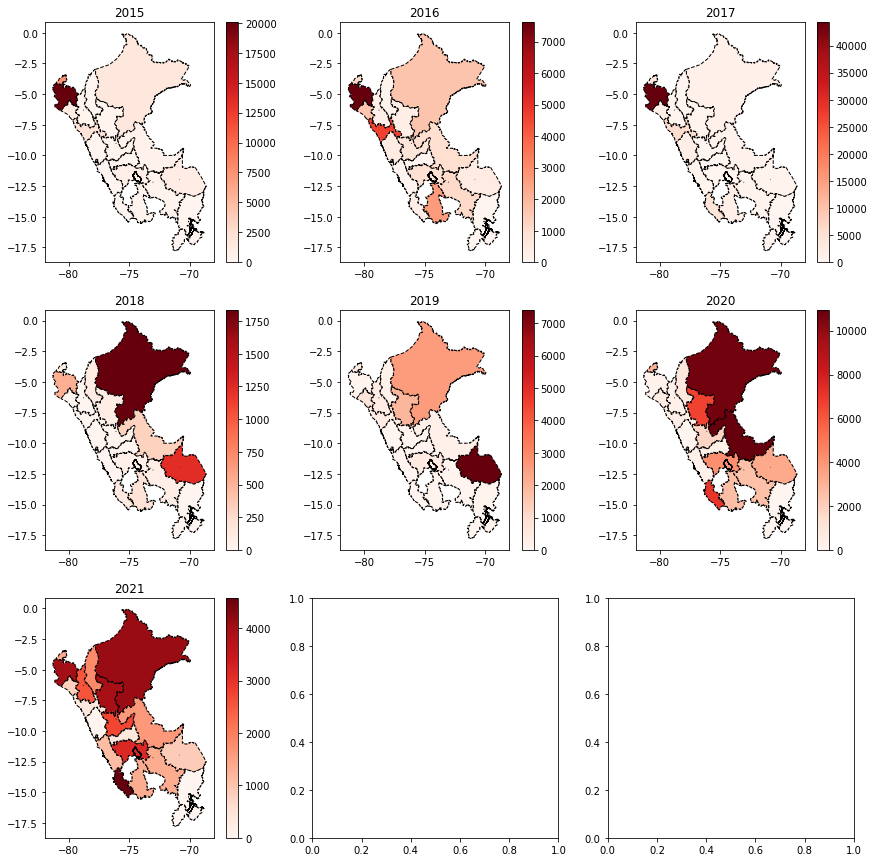

In [44]:
fig, axis = plt.subplots( nrows = 3, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 3 ):
    for j in range ( 3 ):
        
        
        ax = axis[ i ][ j ]
        
        Año = dpt_shpe4.Año.unique()[ idx ]
        
        df6 = dpt_shpe4[ dpt_shpe4.Año == Año ]
        
        df6.plot( column='Casos', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  missing_kwds= dict(color = "#DADADB"),
                  ax = ax 
                )
        
        ax.set_title( Año )
        
        idx = idx + 1

### 7. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. 

In [45]:
dpt_shp_qt = dpt_shp[dpt_shp.Año == 2021]
dpt_shp_qt

,Ubigeo_Departments,geometry,Año,Semana,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Provinces
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
1,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
2,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,AMAZONAS,BAGUA GRANDE,UTCUBAMBA,010701,NaN,0107
3,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
4,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
...,...,...,...,...,...,...,...,...,...,...
172091,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2021,51,UCAYALI,RAYMONDI,ATALAYA,250201,NaN,2502
172092,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2021,52,UCAYALI,CAMPOVERDE,CORONEL PORTILLO,250102,NaN,2501
172093,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2021,52,UCAYALI,RAYMONDI,ATALAYA,250201,NaN,2502
172094,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2021,53,UCAYALI,CAMPOVERDE,CORONEL PORTILLO,250102,NaN,2501


In [46]:
dpt_shpe2_qt = dpt_shp_qt.iloc[:,[0,3,8]]
dpt_shpe2_qt

,Ubigeo_Departments,Semana,Casos
0,01,41,NaN
1,01,41,NaN
2,01,41,NaN
3,01,42,NaN
4,01,42,NaN
...,...,...,...
172091,25,51,NaN
172092,25,52,NaN
172093,25,52,NaN
172094,25,53,NaN


In [47]:
#dpt_shpe2_qt['Casos'].sum()

In [48]:
def categorise(row):  
    if row['Semana'] > 0 and row['Semana'] <= 13:
        return 'Q1'
    elif row['Semana'] > 13 and row['Semana'] <= 26:
        return 'Q2'
    elif row['Semana'] > 26  and row['Semana'] <= 39:
        return 'Q3'
    return 'Q4'

In [49]:
dpt_shpe2_qt['Qt'] = dpt_shpe2_qt.apply(lambda row: categorise(row), axis=1)

C:\Users\a-pal\anaconda3\envs\geogidahatari\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [50]:
dpt_shpe2_qt

,Ubigeo_Departments,Semana,Casos,Qt
0,01,41,NaN,Q4
1,01,41,NaN,Q4
2,01,41,NaN,Q4
3,01,42,NaN,Q4
4,01,42,NaN,Q4
...,...,...,...,...
172091,25,51,NaN,Q4
172092,25,52,NaN,Q4
172093,25,52,NaN,Q4
172094,25,53,NaN,Q4


In [51]:
dpt_shpe3_qt = dpt_shpe2_qt.groupby(['Ubigeo_Departments','Qt']).sum().reset_index()
dpt_shpe3_qt

,Ubigeo_Departments,Qt,Semana,Casos
0,01,Q1,1547,599.0
1,01,Q2,4420,609.0
2,01,Q3,7293,583.0
3,01,Q4,11067,39.0
4,02,Q1,819,3.0
...,...,...,...,...
79,24,Q4,8463,14.0
80,25,Q1,1547,923.0
81,25,Q2,4420,214.0
82,25,Q3,7293,424.0


In [52]:
dpt_shpe4_qt = pd.merge(dpt_shpe3_qt, table7, on = ['Ubigeo_Departments'], how = 'outer')
dpt_shpe4_qt

,Ubigeo_Departments,Qt,Semana,Casos,geometry
0,01,Q1,1547.0,599.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,01,Q2,4420.0,609.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,01,Q3,7293.0,583.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,01,Q4,11067.0,39.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,02,Q1,819.0,3.0,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
...,...,...,...,...,...
83,25,Q4,11067.0,52.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
84,03,NaN,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
85,04,NaN,NaN,NaN,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
86,09,NaN,NaN,NaN,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."


In [53]:
dpt_shpe5_qt = dpt_shpe4_qt.sort_values('Ubigeo_Departments').reset_index(drop=True)
dpt_shpe5_qt

,Ubigeo_Departments,Qt,Semana,Casos,geometry
0,01,Q1,1547.0,599.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,01,Q2,4420.0,609.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,01,Q3,7293.0,583.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,01,Q4,11067.0,39.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,02,Q1,819.0,3.0,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
...,...,...,...,...,...
83,24,Q2,3380.0,461.0,"POLYGON ((-80.39847 -3.98043, -80.39860 -3.980..."
84,25,Q1,1547.0,923.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
85,25,Q2,4420.0,214.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
86,25,Q3,7293.0,424.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."


In [54]:
dpt_shpe6_qt = dpt_shpe5_qt.drop(columns = "Semana")
dpt_shpe6_qt

,Ubigeo_Departments,Qt,Casos,geometry
0,01,Q1,599.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,01,Q2,609.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,01,Q3,583.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,01,Q4,39.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,02,Q1,3.0,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
...,...,...,...,...
83,24,Q2,461.0,"POLYGON ((-80.39847 -3.98043, -80.39860 -3.980..."
84,25,Q1,923.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
85,25,Q2,214.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
86,25,Q3,424.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."


In [55]:
#dpt_shpe4_qt = dpt_shpe3_qt.groupby(['Ubigeo_Departments','Qt']).sum().reset_index()
#dpt_shpe4_qt

In [56]:
#dpt_shpe5_qt = dpt_shpe4_qt.merge(table7)
#dpt_shpe5_qt

In [57]:
#dpt_shpe5_qt_beta = pd.merge(dpt_shpe4_qt, table7, on = ['Ubigeo_Departments'], how = 'outer')
#dpt_shpe5_qt_beta

In [58]:
#dpt_shpe5_qt_beta = dpt_shpe5_qt_beta.sort_values('Ubigeo_Departments').reset_index(drop=True)
#dpt_shpe5_qt_beta

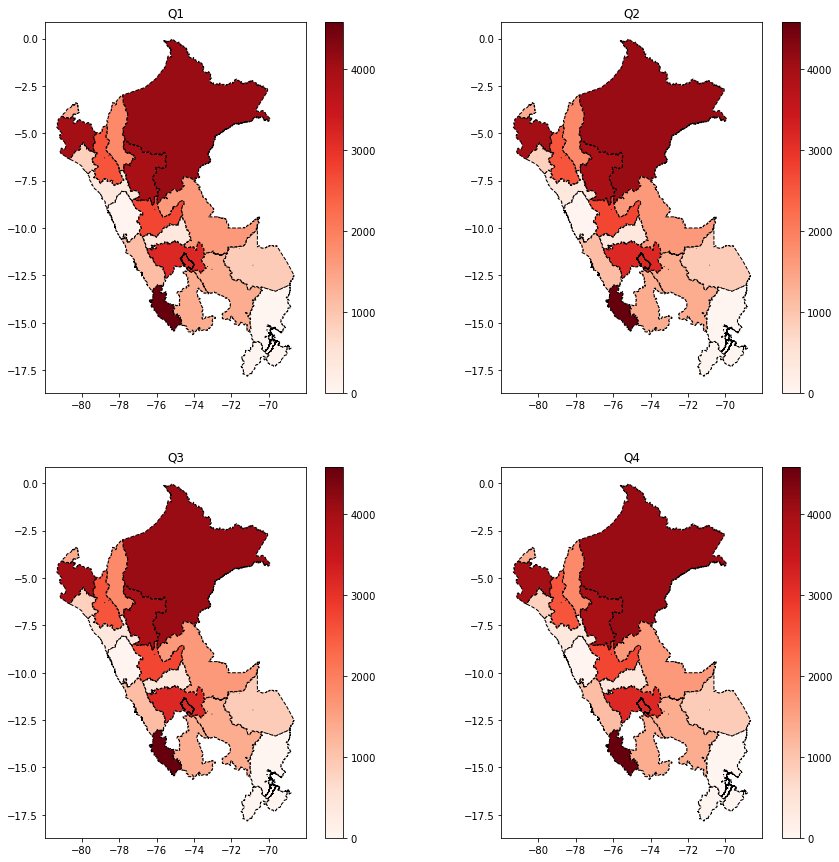

In [60]:
fig, axis = plt.subplots( nrows = 2, ncols= 2, figsize = ( 15, 15 ) )

idx = 0
for i in range( 2 ):
    for j in range ( 2 ):
        
        
        ax = axis[ i ][ j ]
        
        Qt = dpt_shpe6_qt.Qt.unique()[ idx ]
        
        df7 = dpt_shpe6_qt[ dpt_shpe6_qt.Qt == Qt ]
        
        df6.plot( column='Casos', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True,
                  missing_kwds= dict(color = "#DADADB"),
                  ax = ax 
                )
        
        ax.set_title( Qt )
        
        idx = idx + 1